In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
def find_commits(data, f0, at_final=True):
    """ 
    Returns a list with the timesteps where the fmin >= f0 and at the final timestep
    """
    commits = [data['step'].iloc[i] for i in range(len(data)) if data['fmin'].iloc[i] >= f0]
    if at_final and commits[-1] != data['step'].iloc[-1]:
        commits += [data['step'].iloc[-1]]
    return commits

## Article MSR model result

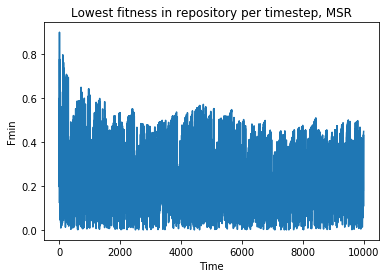

Text(0, 0.5, 'Fmin')

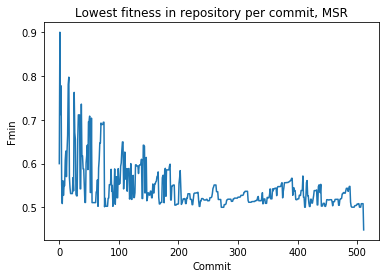

In [144]:
data_MSR = pd.read_csv('mrs_result__19_20_24_40.csv')
plt.plot(data_MSR['fmin'])
plt.title('Lowest fitness in repository per timestep, MSR')
plt.xlabel('Time')
plt.ylabel('Fmin')
plt.show()

commits_MSR = find_commits(data_MSR, .5)    
plt.plot(range(len(commits_MSR)), data_MSR['fmin'].iloc[commits_MSR])
plt.title('Lowest fitness in repository per commit, MSR')
plt.xlabel('Commit')
plt.ylabel('Fmin')

# Our own results

## With multiple calls and recursion

In [165]:
# Change filename to the name of the file in model/results you want to plot
filename = 'result_0_19_20_53_34_withrec.csv'
# data = pd.read_csv('../model/results/'+filename)
data_with = pd.read_csv(filename)


commits_with = find_commits(data_with, .5)    

Text(0, 0.5, 'Fmin')

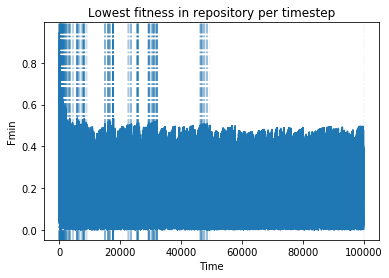

In [166]:
plt.plot(data_with['fmin'])
for commit in commits_with:
    plt.axvline(commit, alpha=.05, linestyle='-.')
plt.title('Lowest fitness in repository per timestep')
plt.xlabel('Time')
plt.ylabel('Fmin')

number of commits: 893


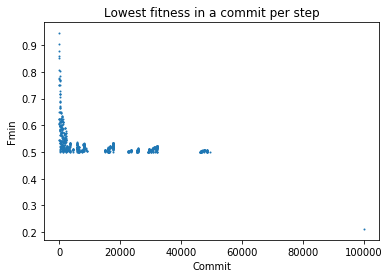

Text(0, 0.5, 'Fmin')

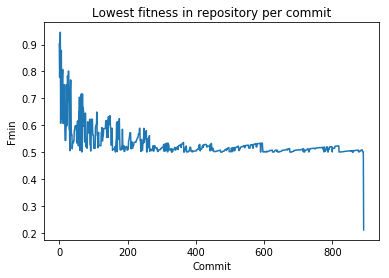

In [167]:
print('number of commits:', len(commits_with))
plt.scatter(commits_with, data_with['fmin'].iloc[commits_with], s=1)
plt.title('Lowest fitness in a commit per step')
plt.xlabel('Commit')
plt.ylabel('Fmin')
plt.show()

plt.plot(range(len(commits_with)), data_with['fmin'].iloc[commits_with])
plt.title('Lowest fitness in repository per commit')
plt.xlabel('Commit')
plt.ylabel('Fmin')

In [168]:
print('used proportions:\n', 
    'update_method, 0.45\n',
    'call_method, 0.4\n',
    'delete_method, 0.05\n',
         'create_method, 0.1\n',
    'create_class, 0.1\n')
data_with['action'].iloc[commits_with].value_counts()/len(commits_with)


used proportions:
 update_method, 0.45
 call_method, 0.4
 delete_method, 0.05
 create_method, 0.1
 create_class, 0.1



update_method    0.669653
call_method      0.202688
remove_method    0.076148
create_method    0.051512
Name: action, dtype: float64

## Without multiple calls and recursion

In [169]:
# Change filename to the name of the file in model/results you want to plot
data_without = pd.read_csv('result_0_19_21_16_10_withoutrec.csv')
commits_without = find_commits(data_without, .5)    

Text(0, 0.5, 'Fmin')

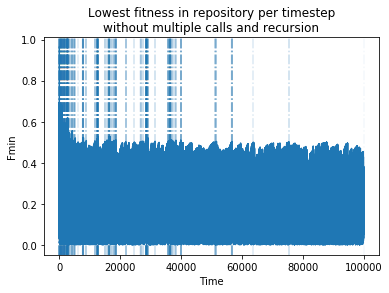

In [170]:
plt.plot(data_without['fmin'])
for commit in commits_without:
    plt.axvline(commit, alpha=.05, linestyle='-.')
plt.title('Lowest fitness in repository per timestep\nwithout multiple calls and recursion')
plt.xlabel('Time')
plt.ylabel('Fmin')

number of commits: 959


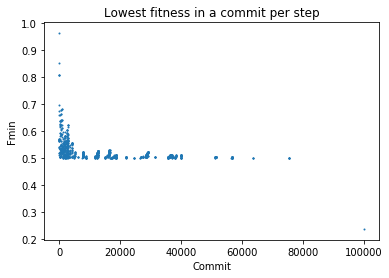

Text(0, 0.5, 'Fmin')

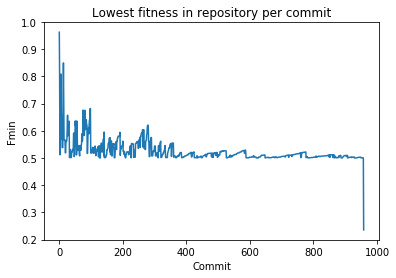

In [171]:
print('number of commits:', len(commits_without))
plt.scatter(commits_without, data_without['fmin'].iloc[commits_without], s=1)
plt.title('Lowest fitness in a commit per step')
plt.xlabel('Commit')
plt.ylabel('Fmin')
plt.show()

plt.plot(range(len(commits_without)), data_without['fmin'].iloc[commits_without])
plt.title('Lowest fitness in repository per commit')
plt.xlabel('Commit')
plt.ylabel('Fmin')

In [172]:
print('used proportions:\n', 
    'update_method, 0.45\n',
    'call_method, 0.4\n',
    'delete_method, 0.05\n',
         'create_method, 0.1\n',
    'create_class, 0.1\n')
data_without['action'].iloc[commits_without].value_counts()/len(commits_without)


used proportions:
 update_method, 0.45
 call_method, 0.4
 delete_method, 0.05
 create_method, 0.1
 create_class, 0.1



update_method    0.671533
call_method      0.213764
remove_method    0.070907
create_method    0.043796
Name: action, dtype: float64

## Added stats

In [173]:
# Change filename to the name of the file in model/results you want to plot
data_stats = pd.read_csv('result_0_19_21_27_28_addedstats.csv')
commits = find_commits(data_stats, .5)    
# data

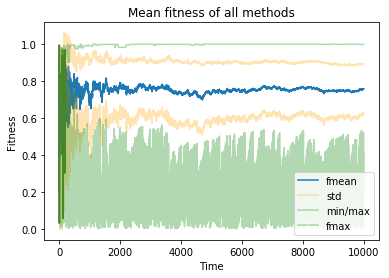

In [174]:
plt.plot(data_stats['fmean'], label='fmean')
plt.plot(data_stats['fmean']+data_stats['fstd'], c='orange', alpha=.3, label='std')
plt.plot(data_stats['fmean']-data_stats['fstd'], c='orange', alpha=.3)
plt.plot(data_stats['fmin'], c='green', alpha=.3, label='min/max')
plt.plot(data_stats['fmax'], c='green', alpha=.3)

plt.title('Mean fitness of all methods')
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.legend()

Text(0.5, 1.0, 'Number of methods over time')

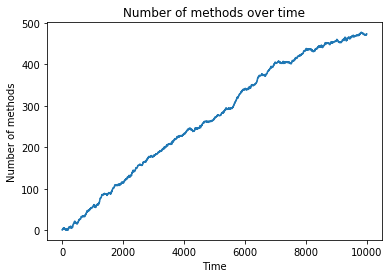

In [175]:
plt.plot(data_stats['fnum'])
plt.ylabel('Number of methods')
plt.xlabel('Time')
plt.title('Number of methods over time')